In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import MultinomialNB
from imblearn.over_sampling import RandomOverSampler

In [2]:
df = pd.read_csv('final_df.csv')
df

,Condition,Sex,Age,Country,BMI,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,...,Phocaeicola,Paraprevotella,Tidjanibacter,Flavonifractor,Mediterraneibacter,Agathobacter,Ligilactobacillus,Anaerobutyricum,Escherichia,Collinsella
0,0,male,0.0,United States of America,21.22,0.062933,0.588542,0.010329,0.025237,0.006070,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,male,62.0,United Kingdom,28.70,0.086461,0.457608,0.033337,0.018467,0.004317,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,male,63.0,Austria,30.90,0.086534,0.066497,0.026914,0.069686,0.082436,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,male,67.0,United States of America,22.15,0.138701,0.333954,0.014312,0.021643,0.004422,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,male,27.0,United States of America,20.80,0.161436,0.379339,0.113208,0.075742,0.002161,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1603,5,male,58.0,USA,25.80,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1604,0,male,68.0,USA,28.75,0.000000,0.090909,0.000000,0.000000,0.000000,...,0.0,0.909091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1605,5,female,59.0,USA,23.66,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1606,5,female,56.0,USA,43.85,0.000000,0.125000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df = df[(df['Condition'] != 1) & (df['Condition'] != 2) & (df['Condition'] != 3) & (df['Condition'] != 4) & 
        (df['Condition'] != 5) & (df['Condition'] != 7) & (df['Condition'] != 8)]

In [4]:
df['Condition'].unique()

array([0, 6])

In [5]:
df['Condition'] = df['Condition'].map({0:0, 6: 1})

/var/folders/gw/6zvc4vx95yx8vrymkvc5m8zm0000gn/T/ipykernel_21807/2187141040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Condition'] = df['Condition'].map({0:0, 6: 1})


In [6]:
df['Condition'].unique()

array([0, 1])

In [7]:
df

,Condition,Sex,Age,Country,BMI,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,...,Phocaeicola,Paraprevotella,Tidjanibacter,Flavonifractor,Mediterraneibacter,Agathobacter,Ligilactobacillus,Anaerobutyricum,Escherichia,Collinsella
0,0,male,0.0,United States of America,21.22,0.062933,0.588542,0.010329,0.025237,0.006070,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,male,62.0,United Kingdom,28.70,0.086461,0.457608,0.033337,0.018467,0.004317,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,male,63.0,Austria,30.90,0.086534,0.066497,0.026914,0.069686,0.082436,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,male,67.0,United States of America,22.15,0.138701,0.333954,0.014312,0.021643,0.004422,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,male,27.0,United States of America,20.80,0.161436,0.379339,0.113208,0.075742,0.002161,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,0,male,32.0,USA,23.71,0.000000,0.000000,0.000000,0.500000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1590,0,male,69.0,USA,25.11,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1592,0,male,73.0,USA,24.13,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1598,0,female,32.0,USA,29.05,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df[df['Condition'] == 1]

,Condition,Sex,Age,Country,BMI,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,...,Phocaeicola,Paraprevotella,Tidjanibacter,Flavonifractor,Mediterraneibacter,Agathobacter,Ligilactobacillus,Anaerobutyricum,Escherichia,Collinsella
1074,1,male,58.0,United States of America,24.93,0.082120,0.295298,0.000957,0.015196,0.000598,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1075,1,male,36.0,United States of America,21.02,0.000124,0.460733,0.000288,0.017388,0.000906,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1076,1,male,43.0,United States of America,22.91,0.043864,0.235075,0.000682,0.029773,0.002462,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1077,1,male,6.0,Canada,15.62,0.028810,0.471661,0.000377,0.018871,0.001132,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1078,1,male,6.0,Canada,15.62,0.066645,0.418171,0.000499,0.075381,0.002746,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1079,1,male,63.0,United States of America,23.87,0.136779,0.205799,0.005988,0.024898,0.000315,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1080,1,male,70.0,United States of America,17.94,0.023543,0.497392,0.025406,0.106914,0.000373,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1081,1,male,9.0,United States of America,27.46,0.000147,0.093093,0.428670,0.000246,0.000835,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1082,1,male,8.0,United States of America,14.23,0.012788,0.264387,0.009174,0.005282,0.000278,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1083,1,male,27.0,United States of America,21.79,0.315649,0.545182,0.000083,0.005830,0.003248,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df = df.drop(['Country', 'BMI'], axis=1)

In [10]:
df

,Condition,Sex,Age,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,...,Phocaeicola,Paraprevotella,Tidjanibacter,Flavonifractor,Mediterraneibacter,Agathobacter,Ligilactobacillus,Anaerobutyricum,Escherichia,Collinsella
0,0,male,0.0,0.062933,0.588542,0.010329,0.025237,0.006070,0.001171,0.015014,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,male,62.0,0.086461,0.457608,0.033337,0.018467,0.004317,0.001799,0.041012,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,male,63.0,0.086534,0.066497,0.026914,0.069686,0.082436,0.043823,0.257714,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,male,67.0,0.138701,0.333954,0.014312,0.021643,0.004422,0.000233,0.005934,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,male,27.0,0.161436,0.379339,0.113208,0.075742,0.002161,0.004188,0.030981,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,0,male,32.0,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1590,0,male,69.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1592,0,male,73.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1598,0,female,32.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
df = df.loc[:, (df != 0).any(axis=0)]

In [12]:
df

,Condition,Sex,Age,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,...,Sporobacter,Ruminiclostridium,Corynebacterium,Eggerthella,Acinetobacter,Parasutterella,Veillonella,Phocaeicola,Paraprevotella,Tidjanibacter
0,0,male,0.0,0.062933,0.588542,0.010329,0.025237,0.006070,0.001171,0.015014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0,male,62.0,0.086461,0.457608,0.033337,0.018467,0.004317,0.001799,0.041012,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0,male,63.0,0.086534,0.066497,0.026914,0.069686,0.082436,0.043823,0.257714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0,male,67.0,0.138701,0.333954,0.014312,0.021643,0.004422,0.000233,0.005934,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0,male,27.0,0.161436,0.379339,0.113208,0.075742,0.002161,0.004188,0.030981,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,0,male,32.0,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1590,0,male,69.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1592,0,male,73.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1598,0,female,32.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [13]:
df = df[df['Age'] >= 1]

In [14]:
df

,Condition,Sex,Age,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,...,Sporobacter,Ruminiclostridium,Corynebacterium,Eggerthella,Acinetobacter,Parasutterella,Veillonella,Phocaeicola,Paraprevotella,Tidjanibacter
1,0,male,62.0,0.086461,0.457608,0.033337,0.018467,0.004317,0.001799,0.041012,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0,male,63.0,0.086534,0.066497,0.026914,0.069686,0.082436,0.043823,0.257714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0,male,67.0,0.138701,0.333954,0.014312,0.021643,0.004422,0.000233,0.005934,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0,male,27.0,0.161436,0.379339,0.113208,0.075742,0.002161,0.004188,0.030981,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
5,0,male,34.0,0.051193,0.300099,0.118299,0.034665,0.005867,0.016604,0.026881,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,0,male,32.0,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1590,0,male,69.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1592,0,male,73.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1598,0,female,32.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [15]:
ep = df[df['Condition'] == 1]
ep

,Condition,Sex,Age,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,...,Sporobacter,Ruminiclostridium,Corynebacterium,Eggerthella,Acinetobacter,Parasutterella,Veillonella,Phocaeicola,Paraprevotella,Tidjanibacter
1074,1,male,58.0,0.082120,0.295298,0.000957,0.015196,0.000598,0.000000,0.003789,...,0.000279,0.000000,0.000160,0.000160,0.000000,0.000000,0.000000,0.0,0.0,0.0
1075,1,male,36.0,0.000124,0.460733,0.000288,0.017388,0.000906,0.000000,0.011990,...,0.000082,0.000000,0.000330,0.000618,0.000000,0.000000,0.000000,0.0,0.0,0.0
1076,1,male,43.0,0.043864,0.235075,0.000682,0.029773,0.002462,0.000000,0.052083,...,0.006174,0.000000,0.000152,0.000038,0.000000,0.000000,0.000000,0.0,0.0,0.0
1077,1,male,6.0,0.028810,0.471661,0.000377,0.018871,0.001132,0.000000,0.017865,...,0.005158,0.000000,0.000063,0.000440,0.000000,0.000000,0.000000,0.0,0.0,0.0
1078,1,male,6.0,0.066645,0.418171,0.000499,0.075381,0.002746,0.000000,0.001498,...,0.005991,0.000000,0.000166,0.002330,0.000000,0.000000,0.000000,0.0,0.0,0.0
1079,1,male,63.0,0.136779,0.205799,0.005988,0.024898,0.000315,0.000000,0.011031,...,0.002836,0.000000,0.000000,0.000315,0.000000,0.000000,0.000000,0.0,0.0,0.0
1080,1,male,70.0,0.023543,0.497392,0.025406,0.106914,0.000373,0.000000,0.001043,...,0.000149,0.000000,0.043287,0.007227,0.000000,0.000000,0.000000,0.0,0.0,0.0
1081,1,male,9.0,0.000147,0.093093,0.428670,0.000246,0.000835,0.000000,0.000197,...,0.000000,0.000000,0.001867,0.000197,0.000000,0.000000,0.000000,0.0,0.0,0.0
1082,1,male,8.0,0.012788,0.264387,0.009174,0.005282,0.000278,0.000000,0.008896,...,0.000834,0.000000,0.004726,0.001112,0.000000,0.000000,0.000000,0.0,0.0,0.0
1083,1,male,27.0,0.315649,0.545182,0.000083,0.005830,0.003248,0.000000,0.000583,...,0.000416,0.000000,0.000999,0.000333,0.000000,0.000000,0.000000,0.0,0.0,0.0


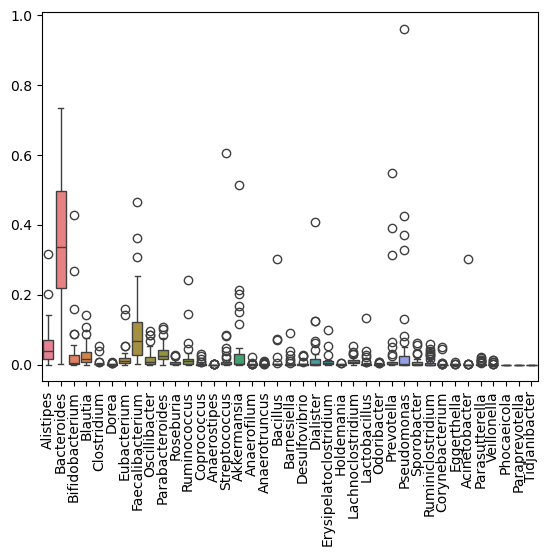

In [16]:
ep = ep.drop(['Condition', 'Age', 'Sex'], axis=1)
sns.boxplot(ep)
plt.xticks(rotation=90)
plt.show()

In [17]:
ep['Bifidobacterium'].sum()

1.322231394597383

In [18]:
y = df['Condition']

In [19]:
df = df.drop(['Condition', 'Sex', 'Age'], axis=1)

In [20]:
df

,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,Parabacteroides,...,Sporobacter,Ruminiclostridium,Corynebacterium,Eggerthella,Acinetobacter,Parasutterella,Veillonella,Phocaeicola,Paraprevotella,Tidjanibacter
1,0.086461,0.457608,0.033337,0.018467,0.004317,0.001799,0.041012,0.162969,0.097854,0.022425,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.086534,0.066497,0.026914,0.069686,0.082436,0.043823,0.257714,0.176429,0.003115,0.003892,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.138701,0.333954,0.014312,0.021643,0.004422,0.000233,0.005934,0.326507,0.083430,0.060624,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.161436,0.379339,0.113208,0.075742,0.002161,0.004188,0.030981,0.035214,0.012203,0.044716,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
5,0.051193,0.300099,0.118299,0.034665,0.005867,0.016604,0.026881,0.119143,0.083749,0.052343,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1590,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1592,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1598,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [21]:
numeric_cols = df.select_dtypes(include='number').columns 
df[numeric_cols] = df[numeric_cols].apply(lambda col: np.where(col > 0, col.name, 0))
df

,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,Parabacteroides,...,Sporobacter,Ruminiclostridium,Corynebacterium,Eggerthella,Acinetobacter,Parasutterella,Veillonella,Phocaeicola,Paraprevotella,Tidjanibacter
1,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,Parabacteroides,...,0,0,0,0,0,0,0,0,0,0
2,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,Parabacteroides,...,0,0,0,0,0,0,0,0,0,0
3,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,Parabacteroides,...,0,0,0,0,0,0,0,0,0,0
4,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,Parabacteroides,...,0,0,0,0,0,0,0,0,0,0
5,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,Parabacteroides,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,0,0,0,Blautia,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1590,0,Bacteroides,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1592,0,0,0,0,0,0,0,0,Oscillibacter,0,...,0,0,0,0,0,0,0,0,0,0
1598,0,0,0,0,0,0,0,0,0,Parabacteroides,...,0,0,0,0,0,0,0,0,0,0


In [22]:
df.columns = range(1, len(df.columns) + 1)

In [23]:
df.reset_index(drop=True)

,1,2,3,4,5,6,7,8,9,10,...,30,31,32,33,34,35,36,37,38,39
0,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,Parabacteroides,...,0,0,0,0,0,0,0,0,0,0
1,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,Parabacteroides,...,0,0,0,0,0,0,0,0,0,0
2,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,Parabacteroides,...,0,0,0,0,0,0,0,0,0,0
3,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,Parabacteroides,...,0,0,0,0,0,0,0,0,0,0
4,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,Parabacteroides,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,0,0,0,Blautia,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
223,0,Bacteroides,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
224,0,0,0,0,0,0,0,0,Oscillibacter,0,...,0,0,0,0,0,0,0,0,0,0
225,0,0,0,0,0,0,0,0,0,Parabacteroides,...,0,0,0,0,0,0,0,0,0,0


In [24]:
df.replace("0", pd.NA, inplace=True)
df = df.apply(lambda x: x.dropna().tolist(), axis=1).tolist()

In [25]:
df = pd.DataFrame(df)
df.fillna('').replace('None', '', inplace=True)

In [26]:
df

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,Parabacteroides,...,None,None,None,None,None,None,None,None,None,None
1,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,Parabacteroides,...,None,None,None,None,None,None,None,None,None,None
2,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,Parabacteroides,...,None,None,None,None,None,None,None,None,None,None
3,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,Parabacteroides,...,None,None,None,None,None,None,None,None,None,None
4,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,Parabacteroides,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,Blautia,Roseburia,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
223,Bacteroides,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
224,Oscillibacter,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
225,Parabacteroides,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [27]:
df.fillna(0, inplace=True)

In [28]:
df

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,Parabacteroides,...,0,0,0,0,0,0,0,0,0,0
1,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,Parabacteroides,...,0,0,0,0,0,0,0,0,0,0
2,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,Parabacteroides,...,0,0,0,0,0,0,0,0,0,0
3,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,Parabacteroides,...,0,0,0,0,0,0,0,0,0,0
4,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,Parabacteroides,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,Blautia,Roseburia,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
223,Bacteroides,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
224,Oscillibacter,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
225,Parabacteroides,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
items = set()
for col in df:
    items.update(df[col].unique())
print(items)

{0, 'Paraprevotella', 'Ruminiclostridium', 'Tidjanibacter', 'Bifidobacterium', 'Phocaeicola', 'Parasutterella', 'Bacillus', 'Eggerthella', 'Eubacterium', 'Lactobacillus', 'Pseudomonas', 'Streptococcus', 'Oscillibacter', 'Alistipes', 'Barnesiella', 'Erysipelatoclostridium', 'Faecalibacterium', 'Akkermansia', 'Odoribacter', 'Corynebacterium', 'Blautia', 'Anaerofilum', 'Desulfovibrio', 'Coprococcus', 'Parabacteroides', 'Lachnoclostridium', 'Anaerostipes', 'Holdemania', 'Veillonella', 'Bacteroides', 'Acinetobacter', 'Ruminococcus', 'Sporobacter', 'Dorea', 'Clostridium', 'Roseburia', 'Anaerotruncus', 'Prevotella', 'Dialister'}


In [30]:
itemset = set(items)
encoded_vals = []
for index, row in df.iterrows():
    rowset = set(row)
    labels = {}
    uncommons = list(itemset - rowset)
    commons = list(itemset.intersection(rowset))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)

# ohe -> One-Hot-Encoded
ohe_df = pd.DataFrame(encoded_vals).drop(columns=0)
ohe_df


,Paraprevotella,Ruminiclostridium,Tidjanibacter,Parasutterella,Phocaeicola,Bacillus,Eggerthella,Lactobacillus,Pseudomonas,Streptococcus,...,Alistipes,Bifidobacterium,Roseburia,Parabacteroides,Faecalibacterium,Bacteroides,Ruminococcus,Dorea,Clostridium,Eubacterium
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
2,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
3,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
223,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
224,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
225,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [31]:
X = ohe_df
X

,Paraprevotella,Ruminiclostridium,Tidjanibacter,Parasutterella,Phocaeicola,Bacillus,Eggerthella,Lactobacillus,Pseudomonas,Streptococcus,...,Alistipes,Bifidobacterium,Roseburia,Parabacteroides,Faecalibacterium,Bacteroides,Ruminococcus,Dorea,Clostridium,Eubacterium
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
2,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
3,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
223,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
224,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
225,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [32]:
X.dtypes

Paraprevotella            int64
Ruminiclostridium         int64
Tidjanibacter             int64
Parasutterella            int64
Phocaeicola               int64
Bacillus                  int64
Eggerthella               int64
Lactobacillus             int64
Pseudomonas               int64
Streptococcus             int64
Barnesiella               int64
Erysipelatoclostridium    int64
Akkermansia               int64
Odoribacter               int64
Corynebacterium           int64
Anaerofilum               int64
Desulfovibrio             int64
Coprococcus               int64
Lachnoclostridium         int64
Anaerostipes              int64
Holdemania                int64
Veillonella               int64
Acinetobacter             int64
Sporobacter               int64
Anaerotruncus             int64
Prevotella                int64
Dialister                 int64
Blautia                   int64
Oscillibacter             int64
Alistipes                 int64
Bifidobacterium           int64
Roseburi

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

In [34]:
X_train.columns

Index(['Paraprevotella', 'Ruminiclostridium', 'Tidjanibacter',
       'Parasutterella', 'Phocaeicola', 'Bacillus', 'Eggerthella',
       'Lactobacillus', 'Pseudomonas', 'Streptococcus', 'Barnesiella',
       'Erysipelatoclostridium', 'Akkermansia', 'Odoribacter',
       'Corynebacterium', 'Anaerofilum', 'Desulfovibrio', 'Coprococcus',
       'Lachnoclostridium', 'Anaerostipes', 'Holdemania', 'Veillonella',
       'Acinetobacter', 'Sporobacter', 'Anaerotruncus', 'Prevotella',
       'Dialister', 'Blautia', 'Oscillibacter', 'Alistipes', 'Bifidobacterium',
       'Roseburia', 'Parabacteroides', 'Faecalibacterium', 'Bacteroides',
       'Ruminococcus', 'Dorea', 'Clostridium', 'Eubacterium'],
      dtype='object')

## Multinomial NB

In [35]:
model = MultinomialNB()

In [36]:
model.fit(X_train, y_train)

MultinomialNB()

In [37]:
y_pred = model.predict(X_test)

In [38]:
accuracy = accuracy_score(y_test, y_pred)
np.round(accuracy, decimals=4)

1.0

In [39]:
y_prob = model.predict_proba(X_test)
# rows are samples and the columns are the probabilities of that sample belonging to the corresponding class 
y_prob[1]

array([2.01354177e-20, 1.00000000e+00])

In [40]:
y_test_array = np.array(y_test)
y_test_array

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0])

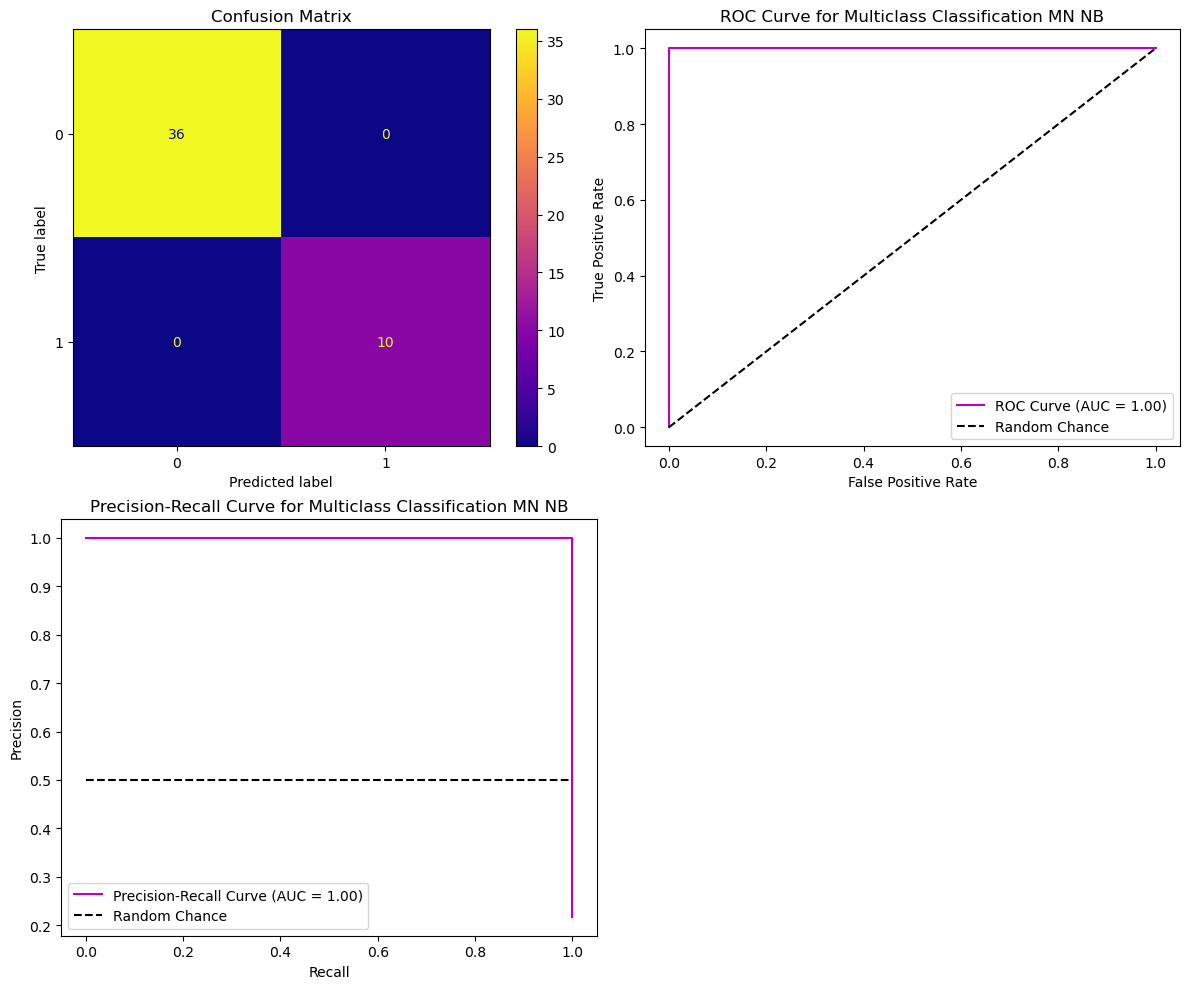

In [41]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))  # 2 rows, 2 columns

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot(cmap='plasma', ax=axs[0, 0])  # Top-left subplot
axs[0, 0].set_title('Confusion Matrix')

# roc curve
fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)
axs[0, 1].plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', c='m')
axs[0, 1].plot([0, 1], [0, 1], 'k--', label='Random Chance')
axs[0, 1].set_xlabel('False Positive Rate')
axs[0, 1].set_ylabel('True Positive Rate')
axs[0, 1].set_title('ROC Curve for Multiclass Classification MN NB')
axs[0, 1].legend()

# precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob[:, 1])
pr_auc = auc(recall, precision)
axs[1, 0].plot(recall, precision, label=f'Precision-Recall Curve (AUC = {pr_auc:.2f})', c='m')

axs[1, 0].plot([0, 1], [0.5, 0.5], 'k--', label='Random Chance')
axs[1, 0].set_xlabel('Recall')
axs[1, 0].set_ylabel('Precision')
axs[1, 0].set_title('Precision-Recall Curve for Multiclass Classification MN NB')
axs[1, 0].legend()

axs[1, 1].axis('off')

plt.tight_layout()
#plt.savefig('dt_neuro_graphs.jpg')
plt.show()


## Logistic Regression

In [64]:
lr = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, C=0.5, max_iter = 1000, random_state=23)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [65]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
np.round(accuracy_lr, decimals=4)

1.0

In [49]:
y_prob_lr = lr.predict_proba(X_test)
# rows are samples and the columns are the probabilities of that sample belonging to the corresponding class 
y_prob_lr[1]

array([0.06817871, 0.93182129])

In [50]:
y_test_array = np.array(y_test)
y_test_array

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0])

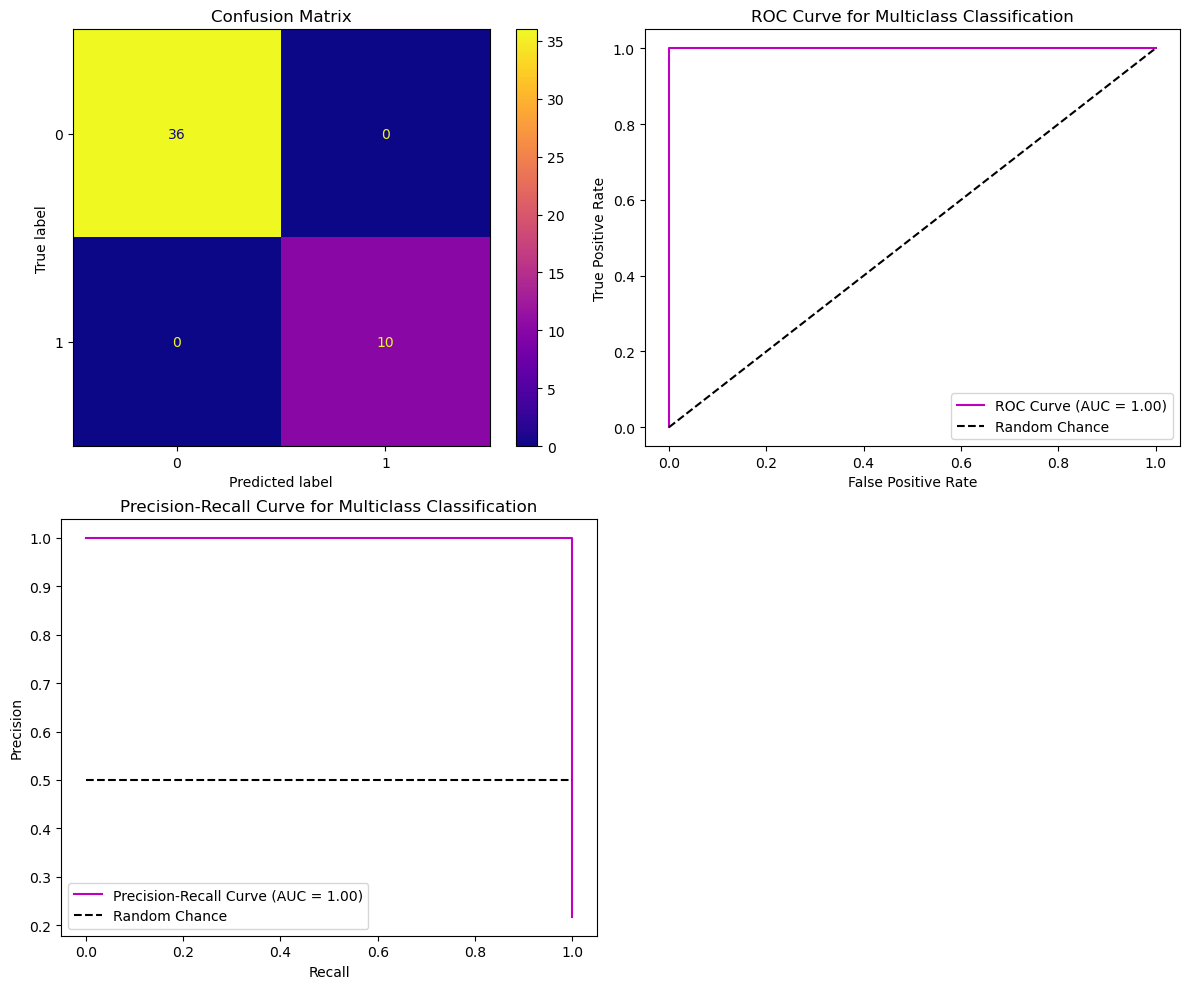

In [51]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))  # 2 rows, 2 columns

# confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot(cmap='plasma', ax=axs[0, 0])  # Top-left subplot
axs[0, 0].set_title('Confusion Matrix')

# roc curve
fpr, tpr, _ = roc_curve(y_test, y_prob_lr[:, 1])
roc_auc = auc(fpr, tpr)
axs[0, 1].plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', c='m')
axs[0, 1].plot([0, 1], [0, 1], 'k--', label='Random Chance')
axs[0, 1].set_xlabel('False Positive Rate')
axs[0, 1].set_ylabel('True Positive Rate')
axs[0, 1].set_title('ROC Curve for Multiclass Classification')
axs[0, 1].legend()

# precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob_lr[:, 1])
pr_auc = auc(recall, precision)
axs[1, 0].plot(recall, precision, label=f'Precision-Recall Curve (AUC = {pr_auc:.2f})', c='m')

axs[1, 0].plot([0, 1], [0.5, 0.5], 'k--', label='Random Chance')
axs[1, 0].set_xlabel('Recall')
axs[1, 0].set_ylabel('Precision')
axs[1, 0].set_title('Precision-Recall Curve for Multiclass Classification')
axs[1, 0].legend()

axs[1, 1].axis('off')

plt.tight_layout()
#plt.savefig('dt_neuro_graphs.jpg')
plt.show()
